In [3]:
import altair as alt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
iris = pd.read_csv('iris.csv')
iris.info()
iris.head(5)
iris.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SepalLength  150 non-null    float64
 1   SepalWidth   150 non-null    float64
 2   PetalLength  150 non-null    float64
 3   PetalWidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLength,SepalWidth,PetalLength,PetalWidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Design Decision 1: 散点图可视化iris特征

choice 1: 直接的散点图
choice 2: 回归散点图

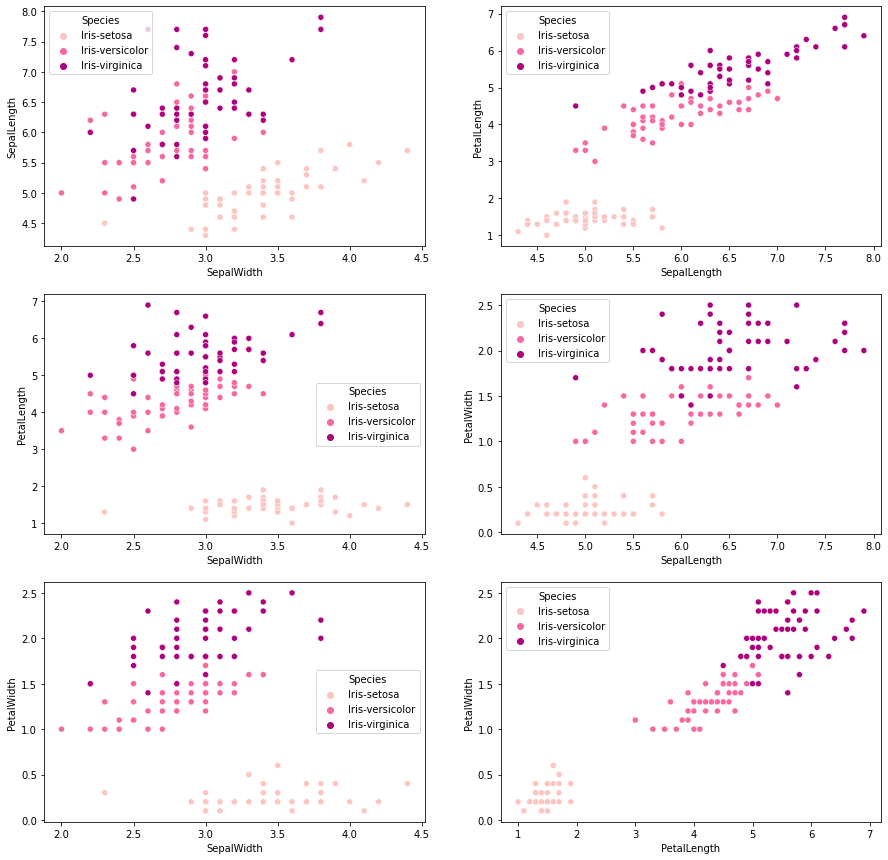

In [45]:
f, axes = plt.subplots(3, 2, figsize=(15, 15))

swsl = sns.scatterplot(data=iris, x='SepalWidth', y='SepalLength', palette='RdPu', hue='Species', ax = axes[0,0])
swpl = sns.scatterplot(data=iris, x='SepalWidth', y='PetalLength', palette='RdPu', hue='Species', ax = axes[1,0])
swpw = sns.scatterplot(data=iris, x='SepalWidth', y='PetalWidth', palette='RdPu', hue='Species', ax = axes[2,0])
slpl = sns.scatterplot(data=iris, x='SepalLength', y='PetalLength', palette='RdPu', hue='Species', ax = axes[0,1])
slpw = sns.scatterplot(data=iris, x='SepalLength', y='PetalWidth', palette='RdPu', hue='Species', ax = axes[1,1])
plpw = sns.scatterplot(data=iris, x='PetalLength', y='PetalWidth', palette='RdPu', hue='Species', ax = axes[2,1])

plt.show()

# Design Decision 2: 数据分布展示方法选择

密度图 vs 数据分布图 展示分布情况。密度图无条目记录，但是更直观的展现了每个参数的中位数。

In [7]:
###数据分布图###
line1 = alt.Chart(iris).mark_bar(interpolate='monotone').encode(
    x='PetalLength:Q', 
    y='count(PetalLength):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line2 = alt.Chart(iris).mark_line(interpolate='monotone').encode(
    x='PetalWidth:Q',
    y='count(PetalWidth):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line3 = alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalLength:Q',
    y='count(SepalLength):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

line4 = alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalWidth:Q',
    y='count(SepalWidth):Q',
    color='Species:N',
    # facet=alt.Facet('Species:N', title=None)
).properties(width=180, height=150)

alt.hconcat(line1,line2,line3,line4)

alt.HConcatChart(...)

# Design Decision 3: 筛选与不筛选

For locating information。
筛选掉糅合项，能更便于观测某一品种的分布。需要观测所有属性的分布也可以在集合中把属性添加，比没有这个设计方案更便捷。

In [47]:
first = alt.Chart().mark_point(filled=True,size=20).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['SepalLength'],
    column=['SepalWidth', 'PetalLength', 'PetalWidth']
)
#--------------------------------------------------------------------
second = alt.Chart().mark_point(filled=True,size=29).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['SepalWidth'],
    column=['PetalLength', 'PetalWidth']
)
#--------------------------------------------------------------------
third = alt.Chart().mark_point(filled=True,size=20).encode(
    alt.X(alt.repeat('column'), type='quantitative'),
    alt.Y(alt.repeat('row'), type='quantitative'),
    color='Species:N',
).properties(
    width=150,
    height=150
).repeat(
    data = iris,
    row=['PetalLength'],
    column=['PetalWidth']
)
#--------------------------------------------------------------------
alt.vconcat(first,second,third)

alt.VConcatChart(...)

# Design Decision 4: 热力图与二维直方图

# Design Decision 5: 是否合并箱线图和琴图

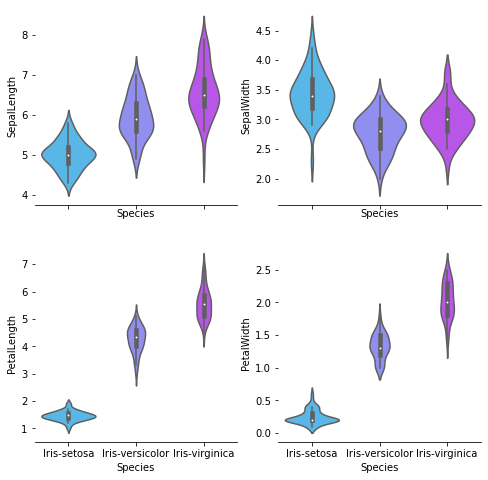

In [55]:
f, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True)
sns.despine(left=True)

sns.violinplot(x='Species', y='SepalLength', data=iris, palette='cool', ax=axes[0, 0])
sns.violinplot(x='Species', y='SepalWidth', data=iris, palette='cool', ax=axes[0, 1])
sns.violinplot(x='Species', y='PetalLength', data=iris, palette='cool', ax=axes[1, 0])
sns.violinplot(x='Species', y='PetalWidth', data=iris, palette='cool', ax=axes[1, 1])

plt.show()

# 密度预估曲线图

In [13]:
alt.Chart(iris).transform_fold(
    ['PetalWidth',
     'PetalLength',
     'SepalWidth',
     'SepalLength'],
    as_ = ['Measurement_type', 'value']
).transform_density(
    density='value',
    bandwidth=0.3,
    groupby=['Measurement_type'],
    extent= [0, 8],
    counts = True,
    steps=200
).mark_area().encode(
    alt.X('value:Q'),
    alt.Y('density:Q', stack='zero'),
    alt.Color('Measurement_type:N')
).properties(width=400, height=100)

alt.Chart(...)

In [14]:
alt.Chart(iris).mark_area(interpolate='monotone').encode(
    x='SepalLength:Q',
    y='count(SepalLength):Q',
    color='Species:N',
    facet=alt.Facet('Species:N', title=None)
).transform_filter(
    alt.FieldRangePredicate(field='SepalLength', range=[0, 5.5])
).properties(width=200, height=150)

alt.Chart(...)

# Design Decision6: andrew曲线 或者 parallel_coordinates

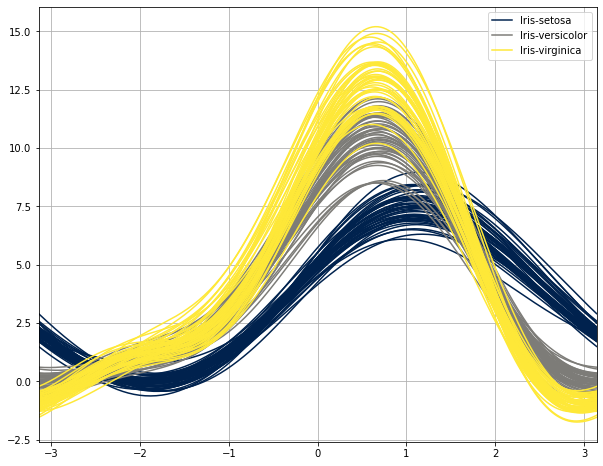

In [22]:
plt.subplots(figsize = (10,8))
pd.plotting.andrews_curves(iris, 'Species', colormap='cividis')
plt.show()